In [44]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model

In [45]:
# Reading in the .csv file
df_v3 = pd.read_csv('healthexpenditure_data.csv', index_col=0)
df_v3.head()

,Expenditure,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Total National Health Expenditures,"2,023,744","2,156,158",2295307.0,2399121.0,2495414.0,2598823.0,2689349.0,2797260.0,2879008.0,3026157.0,3200815.0,3337248.0
1,Out of pocket,"263,815","273,254",290000.0,295184.0,293723.0,299742.0,309973.0,318330.0,325189.0,330068.0,339315.0,352537.0
2,Health Insurance,"1,414,078","1,517,387",1609250.0,1695968.0,1796424.0,1876922.0,1950187.0,2022904.0,2087804.0,2228136.0,2382770.0,2486842.0
3,Private Health Insurance,"701,176","737,122",776176.0,802857.0,832906.0,864344.0,898631.0,928211.0,946398.0,999940.0,1068778.0,1123372.0
4,Medicare,"339,762","403,690",432751.0,466971.0,498859.0,519787.0,544679.0,569634.0,590163.0,618889.0,648808.0,672093.0


In [46]:
df_v3[:-534]

,Expenditure,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Total National Health Expenditures,"2,023,744","2,156,158",2295307.0,2399121.0,2495414.0,2598823.0,2689349.0,2797260.0,2879008.0,3026157.0,3200815.0,3337248.0
1,Out of pocket,"263,815","273,254",290000.0,295184.0,293723.0,299742.0,309973.0,318330.0,325189.0,330068.0,339315.0,352537.0
2,Health Insurance,"1,414,078","1,517,387",1609250.0,1695968.0,1796424.0,1876922.0,1950187.0,2022904.0,2087804.0,2228136.0,2382770.0,2486842.0
3,Private Health Insurance,"701,176","737,122",776176.0,802857.0,832906.0,864344.0,898631.0,928211.0,946398.0,999940.0,1068778.0,1123372.0
4,Medicare,"339,762","403,690",432751.0,466971.0,498859.0,519787.0,544679.0,569634.0,590163.0,618889.0,648808.0,672093.0
5,Medicaid (Title XIX),"309,275","306,584",325746.0,344214.0,374421.0,397226.0,406744.0,422688.0,445361.0,496645.0,544073.0,565550.0
6,Federal,"177,461","173,879",185485.0,203084.0,247326.0,266360.0,247125.0,243251.0,256907.0,305106.0,343123.0,358095.0
7,State and Local,"131,814","132,705",140261.0,141129.0,127094.0,130865.0,159619.0,179438.0,188454.0,191540.0,200951.0,207454.0


In [47]:
df_v3.drop(df_v3.columns[1:3], axis=1, inplace=True)

In [48]:
df_v3

,Expenditure,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Total National Health Expenditures,2295307.0,2399121.0,2495414.0,2598823.0,2689349.0,2797260.0,2879008.0,3026157.0,3200815.0,3337248.0
1,Out of pocket,290000.0,295184.0,293723.0,299742.0,309973.0,318330.0,325189.0,330068.0,339315.0,352537.0
2,Health Insurance,1609250.0,1695968.0,1796424.0,1876922.0,1950187.0,2022904.0,2087804.0,2228136.0,2382770.0,2486842.0
3,Private Health Insurance,776176.0,802857.0,832906.0,864344.0,898631.0,928211.0,946398.0,999940.0,1068778.0,1123372.0
4,Medicare,432751.0,466971.0,498859.0,519787.0,544679.0,569634.0,590163.0,618889.0,648808.0,672093.0
5,Medicaid (Title XIX),325746.0,344214.0,374421.0,397226.0,406744.0,422688.0,445361.0,496645.0,544073.0,565550.0
6,Federal,185485.0,203084.0,247326.0,266360.0,247125.0,243251.0,256907.0,305106.0,343123.0,358095.0
7,State and Local,140261.0,141129.0,127094.0,130865.0,159619.0,179438.0,188454.0,191540.0,200951.0,207454.0
8,CHIP (Title XIX and Title XXI),9117.0,10210.0,11106.0,11540.0,11990.0,12629.0,13509.0,13215.0,14853.0,16883.0
9,Federal,6316.0,7126.0,7812.0,8052.0,8377.0,8780.0,9362.0,9217.0,11106.0,15309.0


In [49]:
df_v3[['Expenditure', '2007', '2008', '2009', '2010', '2011',
                 '2012', '2013', '2014', '2015', '2016']].dropna()

,Expenditure,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Total National Health Expenditures,2295307.0,2399121.0,2495414.0,2598823.0,2689349.0,2797260.0,2879008.0,3026157.0,3200815.0,3337248.0
1,Out of pocket,290000.0,295184.0,293723.0,299742.0,309973.0,318330.0,325189.0,330068.0,339315.0,352537.0
2,Health Insurance,1609250.0,1695968.0,1796424.0,1876922.0,1950187.0,2022904.0,2087804.0,2228136.0,2382770.0,2486842.0
3,Private Health Insurance,776176.0,802857.0,832906.0,864344.0,898631.0,928211.0,946398.0,999940.0,1068778.0,1123372.0
4,Medicare,432751.0,466971.0,498859.0,519787.0,544679.0,569634.0,590163.0,618889.0,648808.0,672093.0
5,Medicaid (Title XIX),325746.0,344214.0,374421.0,397226.0,406744.0,422688.0,445361.0,496645.0,544073.0,565550.0
6,Federal,185485.0,203084.0,247326.0,266360.0,247125.0,243251.0,256907.0,305106.0,343123.0,358095.0
7,State and Local,140261.0,141129.0,127094.0,130865.0,159619.0,179438.0,188454.0,191540.0,200951.0,207454.0
8,CHIP (Title XIX and Title XXI),9117.0,10210.0,11106.0,11540.0,11990.0,12629.0,13509.0,13215.0,14853.0,16883.0
9,Federal,6316.0,7126.0,7812.0,8052.0,8377.0,8780.0,9362.0,9217.0,11106.0,15309.0


In [52]:
df_v3.drop_duplicates()

,Expenditure,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Total National Health Expenditures,2295307.0,2399121.0,2495414.0,2598823.0,2689349.0,2797260.0,2879008.0,3026157.0,3200815.0,3337248.0
1,Out of pocket,290000.0,295184.0,293723.0,299742.0,309973.0,318330.0,325189.0,330068.0,339315.0,352537.0
2,Health Insurance,1609250.0,1695968.0,1796424.0,1876922.0,1950187.0,2022904.0,2087804.0,2228136.0,2382770.0,2486842.0
3,Private Health Insurance,776176.0,802857.0,832906.0,864344.0,898631.0,928211.0,946398.0,999940.0,1068778.0,1123372.0
4,Medicare,432751.0,466971.0,498859.0,519787.0,544679.0,569634.0,590163.0,618889.0,648808.0,672093.0
5,Medicaid (Title XIX),325746.0,344214.0,374421.0,397226.0,406744.0,422688.0,445361.0,496645.0,544073.0,565550.0
6,Federal,185485.0,203084.0,247326.0,266360.0,247125.0,243251.0,256907.0,305106.0,343123.0,358095.0
7,State and Local,140261.0,141129.0,127094.0,130865.0,159619.0,179438.0,188454.0,191540.0,200951.0,207454.0
8,CHIP (Title XIX and Title XXI),9117.0,10210.0,11106.0,11540.0,11990.0,12629.0,13509.0,13215.0,14853.0,16883.0
9,Federal,6316.0,7126.0,7812.0,8052.0,8377.0,8780.0,9362.0,9217.0,11106.0,15309.0


In [53]:
df_v3[['Expenditure', '2007', '2008', '2009', '2010', '2011',
                 '2012', '2013', '2014', '2015', '2016']].dropna()

,Expenditure,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Total National Health Expenditures,2295307.0,2399121.0,2495414.0,2598823.0,2689349.0,2797260.0,2879008.0,3026157.0,3200815.0,3337248.0
1,Out of pocket,290000.0,295184.0,293723.0,299742.0,309973.0,318330.0,325189.0,330068.0,339315.0,352537.0
2,Health Insurance,1609250.0,1695968.0,1796424.0,1876922.0,1950187.0,2022904.0,2087804.0,2228136.0,2382770.0,2486842.0
3,Private Health Insurance,776176.0,802857.0,832906.0,864344.0,898631.0,928211.0,946398.0,999940.0,1068778.0,1123372.0
4,Medicare,432751.0,466971.0,498859.0,519787.0,544679.0,569634.0,590163.0,618889.0,648808.0,672093.0
5,Medicaid (Title XIX),325746.0,344214.0,374421.0,397226.0,406744.0,422688.0,445361.0,496645.0,544073.0,565550.0
6,Federal,185485.0,203084.0,247326.0,266360.0,247125.0,243251.0,256907.0,305106.0,343123.0,358095.0
7,State and Local,140261.0,141129.0,127094.0,130865.0,159619.0,179438.0,188454.0,191540.0,200951.0,207454.0
8,CHIP (Title XIX and Title XXI),9117.0,10210.0,11106.0,11540.0,11990.0,12629.0,13509.0,13215.0,14853.0,16883.0
9,Federal,6316.0,7126.0,7812.0,8052.0,8377.0,8780.0,9362.0,9217.0,11106.0,15309.0


In [39]:
print (df_v3.set_index('Expenditure').T)

Expenditure  Total National Health Expenditures       Out of pocket  \
2007                                  2295307.0            290000.0   
2008                                  2399121.0            295184.0   
2009                                  2495414.0            293723.0   
2010                                  2598823.0            299742.0   
2011                                  2689349.0            309973.0   
2012                                  2797260.0            318330.0   
2013                                  2879008.0            325189.0   
2014                                  3026157.0            330068.0   
2015                                  3200815.0            339315.0   
2016                                  3337248.0            352537.0   

Expenditure       Health Insurance            Private Health Insurance  \
2007                     1609250.0                            776176.0   
2008                     1695968.0                            802857.0

In [40]:
new_df = df_v3.set_index('Expenditure').T

In [41]:
new_df

Expenditure,Total National Health Expenditures,Out of pocket,Health Insurance,Private Health Insurance,Medicare,Medicaid (Title XIX),Federal,State and Local,CHIP (Title XIX and Title XXI),Federal,...,Private,Federal Gov't,State and Local Gov't,Equipment,Private,Federal Gov't,State and Local Gov't,"* Other Federal Programs include OEO, Federal General and Medical, Federal General and Medical NEC, and High Risk Pools under ACA",** Other State and Local Programs include State and Local Subsidies and TDI,"SOURCE: Centers for Medicare & Medicaid Services, Office of the Actuary, National Health Statistics Group."
2007,2295307.0,290000.0,1609250.0,776176.0,432751.0,325746.0,185485.0,140261.0,9117.0,6316.0,...,39802.0,1014.0,5726.0,49277.0,36712.0,4130.0,8435.0,NaN,NaN,NaN
2008,2399121.0,295184.0,1695968.0,802857.0,466971.0,344214.0,203084.0,141129.0,10210.0,7126.0,...,44584.0,944.0,6147.0,52053.0,37769.0,5112.0,9172.0,NaN,NaN,NaN
2009,2495414.0,293723.0,1796424.0,832906.0,498859.0,374421.0,247326.0,127094.0,11106.0,7812.0,...,39013.0,1763.0,6103.0,46713.0,32785.0,5210.0,8718.0,NaN,NaN,NaN
2010,2598823.0,299742.0,1876922.0,864344.0,519787.0,397226.0,266360.0,130865.0,11540.0,8052.0,...,38130.0,2127.0,5847.0,47423.0,33378.0,5364.0,8681.0,NaN,NaN,NaN
2011,2689349.0,309973.0,1950187.0,898631.0,544679.0,406744.0,247125.0,159619.0,11990.0,8377.0,...,38574.0,2589.0,6186.0,52465.0,37702.0,5858.0,8905.0,NaN,NaN,NaN
2012,2797260.0,318330.0,2022904.0,928211.0,569634.0,422688.0,243251.0,179438.0,12629.0,8780.0,...,40596.0,2620.0,6317.0,55249.0,40503.0,5617.0,9129.0,NaN,NaN,NaN
2013,2879008.0,325189.0,2087804.0,946398.0,590163.0,445361.0,256907.0,188454.0,13509.0,9362.0,...,41597.0,2533.0,5942.0,56432.0,41996.0,5202.0,9234.0,NaN,NaN,NaN
2014,3026157.0,330068.0,2228136.0,999940.0,618889.0,496645.0,305106.0,191540.0,13215.0,9217.0,...,41788.0,2348.0,6198.0,53490.0,38469.0,5284.0,9737.0,NaN,NaN,NaN
2015,3200815.0,339315.0,2382770.0,1068778.0,648808.0,544073.0,343123.0,200951.0,14853.0,11106.0,...,42365.0,2240.0,5364.0,57278.0,41760.0,5360.0,10158.0,NaN,NaN,NaN
2016,3337248.0,352537.0,2486842.0,1123372.0,672093.0,565550.0,358095.0,207454.0,16883.0,15309.0,...,43475.0,2233.0,4767.0,59273.0,43070.0,5729.0,10474.0,NaN,NaN,NaN


In [42]:
new_df.drop(new_df.columns[8:542], axis = 1, inplace = True)

In [43]:
new_df

Expenditure,Total National Health Expenditures
2007,2295307.0
2008,2399121.0
2009,2495414.0
2010,2598823.0
2011,2689349.0
2012,2797260.0
2013,2879008.0
2014,3026157.0
2015,3200815.0
2016,3337248.0


In [29]:
df_v3.shape

(542, 11)

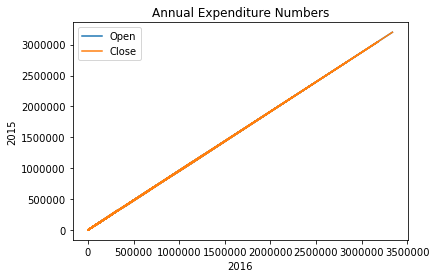

In [26]:
plt.plot(df_v3["2016"], df_v3["2015"], label="Open")
plt.plot(df_v3["2016"], df_v3["2015"], label="Close")
plt.xlabel("2016")
plt.ylabel("2015")
plt.title("Annual Expenditure Numbers")
plt.legend()
plt.show()